# **The Battle of Neighborhoods**

## **Introduction/Business Problem**

The number of vegans in the United States (US) increased from 1 percent in 2014 to 6 percent in 2017. US consumers spent almost 1.9 billion US dollars on plant-based milks and over 3 billion US dollars on plant-based foods in 2018, according to Forbes. The reasons people are adopting these new vegan and plant-based eating habits range from animal welfare issues to health issues as well as environmental concerns, all of which have led to a rise in the total number of vegan restaurants throughout the US.

New York City, with an estimated population of 8.3 million, is home to a flourishing vegan scene and was rated the best city for vegans in the US by US-News in 2019. This report will explore the boroughs and neighborhoods of New York City and recommend locations for opening a new vegan restaurant, based on the locations of current vegan restaurants.

## **Data**

In order to answer the above business problem, data on New York City boroughs, neighborhoods and location coordinates are required. Additionally, obtaining restaurant locations and restaurant ratings are essential.

New York City data containing boroughs, neighborhoods and location coordinates will be obtained from the data source: https://cocl.us/new_york_dataset. Data related to the locations and ratings of vegan restaurants will be obtained by utilizing Foursquare’s Application Programming Interface (API). The ratings and locations obtained via Foursquare will be vital to answering the business problem.

## **Methodology**

Data will be obtained from the data source: https://cocl.us/new_york_dataset. The data will be cleaned and processed into a dataframe. Foursquare’s API will be utilized to locate all venues and then filtered by vegan restaurants. The user ratings per vegan restaurant venue will be added to the dataframe. Data will be sorted by user ratings. Data visualization will be applied to analyze geographical locations via Python libraries.

## **Analysis**

In [1]:
#Import necessary Libraries.
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json #JSON library
import os

import random # library for random number generation

import matplotlib.pyplot as plt # plotting library
import matplotlib.cm as cm
import matplotlib.colors as colors
# backend for rendering plots within the browser
%matplotlib inline 

import seaborn as sns

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

! pip install folium==0.5.0
import folium # plotting library

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

     |████████████████████████████████| 79 kB 7.2 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=2111c454a85f981d7f10b291f025ae97e694b71a049ba0ad1926ad8b3f142e49
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Libraries imported.


In [2]:
!conda install -c conda-forge geopy –yes # uncomment this line if you haven’t completed the Foursquare API lab

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - –yes

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - file:///opt/ibm/build/channels/wscloud/linux-64
  - file:///opt/ibm/build/channels/wscloud/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [3]:
!conda install -c conda-forge folium=0.5.0 –yes # uncomment this line if you haven’t completed the Foursquare API lab
print('folium installed.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - –yes

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - file:///opt/ibm/build/channels/wscloud/linux-64
  - file:///opt/ibm/build/channels/wscloud/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


folium installed.


In [4]:
import folium #map rendering library

#### Download Data

In [5]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print ('data downloaded.')

data downloaded.


In [6]:
with open ('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [7]:
neighborhoods_data = newyork_data['features']

In [8]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

Transform the data into a pandas dataframe

In [9]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)


In [10]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Loop through the data and fill the dataframe one row at a time.

In [11]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)


In [12]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Use geopy library to get the latitude and longitude values of New York City.


In [13]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Create a map of New York with neighborhoods sumperimposed on top.

In [14]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Define Foursquare Credentials and Version

In [15]:
CLIENT_ID = 'YA1WN4SUXOGALLOOKKSWJBOZN2VQEEZ2LNYZGXHW24K0DDDZ' # your Foursquare ID
CLIENT_SECRET = 'KI4VFNQQOXC3OYZFSHMLD40TGJU4ENN0EWRV5DLCLMGOGVM1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YA1WN4SUXOGALLOOKKSWJBOZN2VQEEZ2LNYZGXHW24K0DDDZ
CLIENT_SECRET:KI4VFNQQOXC3OYZFSHMLD40TGJU4ENN0EWRV5DLCLMGOGVM1


Explore Neighborhoods in New York City

In [21]:
neighborhoods.shape

(306, 4)

In [22]:
def get_venues(lat,lng):
    #set variables
    radius=1000
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [23]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_rating=venue_data['rating']
        venue_details.append([venue_id,venue_name,venue_rating])
    except KeyError:
        pass
    column_names=['ID','Name','Rating']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [41]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [43]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
vv_restaurants=pd.DataFrame(columns=column_names)
count=1
for row in neighborhoods.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    vegan_restaurants=venues[venues['Category']=='Vegetarian / Vegan Restaurant']  
    print('(',count,'/',len(neighborhoods),')','Vegan Restaurants in '+Neighborhood+', '+Borough+':'+str(len(vegan_restaurants)))
    print(row)
    for restaurant_detail in vegan_restaurants.values.tolist():
        id, name , category=restaurant_detail
        vv_restaurants = vv_restaurants.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
        count+=1

( 1 / 306 ) Vegan Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 1 / 306 ) Vegan Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 1 / 306 ) Vegan Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 1 / 306 ) Vegan Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 1 / 306 ) Vegan Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 1 / 306 ) Vegan Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 1 / 306 ) Vegan Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 1 / 306 ) Vegan Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 1 / 306 ) Vegan Restaurants in Norwood, Bronx:0
['Bronx', 'Norwood',

( 12 / 306 ) Vegan Restaurants in Gowanus, Brooklyn:0
['Brooklyn', 'Gowanus', 40.673931143187154, -73.99444087145339]
( 12 / 306 ) Vegan Restaurants in Fort Greene, Brooklyn:1
['Brooklyn', 'Fort Greene', 40.68852726018977, -73.97290574369092]
( 13 / 306 ) Vegan Restaurants in Park Slope, Brooklyn:0
['Brooklyn', 'Park Slope', 40.67232052268197, -73.97705030183924]
( 13 / 306 ) Vegan Restaurants in Cypress Hills, Brooklyn:0
['Brooklyn', 'Cypress Hills', 40.68239101144211, -73.87661596457296]
( 13 / 306 ) Vegan Restaurants in East New York, Brooklyn:0
['Brooklyn', 'East New York', 40.669925700847045, -73.88069863917366]
( 13 / 306 ) Vegan Restaurants in Starrett City, Brooklyn:0
['Brooklyn', 'Starrett City', 40.64758905230874, -73.87936970045875]
( 13 / 306 ) Vegan Restaurants in Canarsie, Brooklyn:0
['Brooklyn', 'Canarsie', 40.63556432797428, -73.90209269778966]
( 13 / 306 ) Vegan Restaurants in Flatlands, Brooklyn:0
['Brooklyn', 'Flatlands', 40.630446043757466, -73.92911302644674]
( 13 

( 52 / 306 ) Vegan Restaurants in Howard Beach, Queens:0
['Queens', 'Howard Beach', 40.65422527738487, -73.8381376460028]
( 52 / 306 ) Vegan Restaurants in Corona, Queens:0
['Queens', 'Corona', 40.74238175015667, -73.85682497345258]
( 52 / 306 ) Vegan Restaurants in Forest Hills, Queens:0
['Queens', 'Forest Hills', 40.72526378216503, -73.84447500788983]
( 52 / 306 ) Vegan Restaurants in Kew Gardens, Queens:0
['Queens', 'Kew Gardens', 40.7051790354148, -73.82981905825703]
( 52 / 306 ) Vegan Restaurants in Richmond Hill, Queens:0
['Queens', 'Richmond Hill', 40.69794731471763, -73.83183321446887]
( 52 / 306 ) Vegan Restaurants in Flushing, Queens:0
['Queens', 'Flushing', 40.76445419697846, -73.83177300329582]
( 52 / 306 ) Vegan Restaurants in Long Island City, Queens:0
['Queens', 'Long Island City', 40.75021734610528, -73.93920223915505]
( 52 / 306 ) Vegan Restaurants in Sunnyside, Queens:0
['Queens', 'Sunnyside', 40.74017628351924, -73.92691617561577]
( 52 / 306 ) Vegan Restaurants in Ea

( 60 / 306 ) Vegan Restaurants in West Brighton, Staten Island:0
['Staten Island', 'West Brighton', 40.63187892654607, -74.1071817826561]
( 60 / 306 ) Vegan Restaurants in Grymes Hill, Staten Island:0
['Staten Island', 'Grymes Hill', 40.624184791313006, -74.08724819983729]
( 60 / 306 ) Vegan Restaurants in Todt Hill, Staten Island:0
['Staten Island', 'Todt Hill', 40.59706851814673, -74.1113288180088]
( 60 / 306 ) Vegan Restaurants in South Beach, Staten Island:0
['Staten Island', 'South Beach', 40.58024741350956, -74.0795529253982]
( 60 / 306 ) Vegan Restaurants in Port Richmond, Staten Island:0
['Staten Island', 'Port Richmond', 40.63366930554365, -74.12943426797008]
( 60 / 306 ) Vegan Restaurants in Mariner's Harbor, Staten Island:0
['Staten Island', "Mariner's Harbor", 40.632546390481124, -74.15008537046981]
( 60 / 306 ) Vegan Restaurants in Port Ivory, Staten Island:0
['Staten Island', 'Port Ivory', 40.63968297845542, -74.17464532993542]
( 60 / 306 ) Vegan Restaurants in Castleton 

( 70 / 306 ) Vegan Restaurants in Jamaica Hills, Queens:1
['Queens', 'Jamaica Hills', 40.71145964370482, -73.79646462081593]
( 71 / 306 ) Vegan Restaurants in Utopia, Queens:0
['Queens', 'Utopia', 40.73350025429757, -73.79671678028349]
( 71 / 306 ) Vegan Restaurants in Pomonok, Queens:1
['Queens', 'Pomonok', 40.73493618075478, -73.80486120040537]
( 72 / 306 ) Vegan Restaurants in Astoria Heights, Queens:0
['Queens', 'Astoria Heights', 40.7703173929982, -73.89467996270574]
( 72 / 306 ) Vegan Restaurants in Claremont Village, Bronx:0
['Bronx', 'Claremont Village', 40.83142834161548, -73.90119903387667]
( 72 / 306 ) Vegan Restaurants in Concourse Village, Bronx:0
['Bronx', 'Concourse Village', 40.824780490842905, -73.91584652759009]
( 72 / 306 ) Vegan Restaurants in Mount Eden, Bronx:0
['Bronx', 'Mount Eden', 40.84382617671654, -73.91655551964419]
( 72 / 306 ) Vegan Restaurants in Mount Hope, Bronx:0
['Bronx', 'Mount Hope', 40.84884160724665, -73.90829930881988]
( 72 / 306 ) Vegan Restaur

In [46]:
vv_restaurants.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Williamsbridge,4c169bfacd4bc9b6a7ac4eeb,Green Garden Health Food Store
1,Bronx,Olinville,4c169bfacd4bc9b6a7ac4eeb,Green Garden Health Food Store
2,Bronx,Edenwald,4bfa9ebf8d30d13a31d60318,Vegan's Delight
3,Brooklyn,Bay Ridge,55c159c5498e6e82b8f62043,Shangri-La Vegetarian
4,Brooklyn,Sunset Park,5548f518498e8f7858764111,Lucky Vegetarian


In [47]:
vv_restaurants.shape

(79, 4)

In [49]:
vv_restaurants.tail()

,Borough,Neighborhood,ID,Name
74,Manhattan,Tudor City,5cc1f2e804d1ae002cf25f49,Le Botaniste
75,Manhattan,Stuyvesant Town,549c6881498eaaf3954382f3,Superiority Burger
76,Manhattan,Flatiron,585285cbc0df765c553a2c84,abcV
77,Manhattan,Flatiron,573524b1498ecb3c2350f732,The Little Beet
78,Brooklyn,Weeksville,4d4480681911a09332ded8d8,Italfari


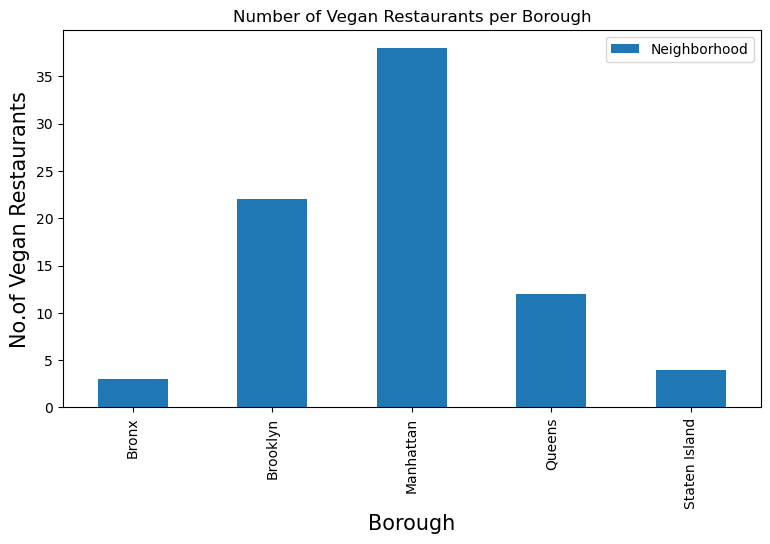

In [67]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Vegan Restaurants per Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Vegan Restaurants', fontsize=15)
#giving a bar plot
vv_restaurants.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()


Manhattan has the largest number of vegan restaurants followed by Brooklyn and Queens.  Bronx and Staten Island have the least number of vegan restaurants.

In [68]:
top_neighborhoods = 10 #let's look at top 10 neighborhoods for all of NYC

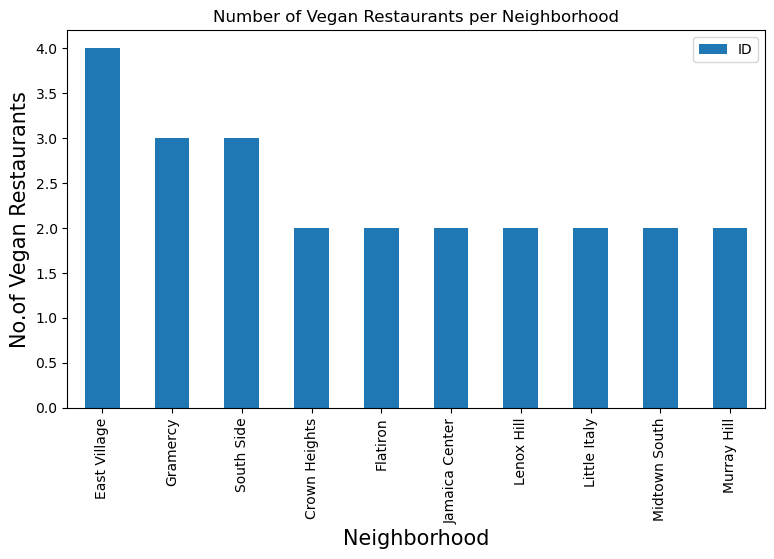

In [70]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Vegan Restaurants per Neighborhood')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Vegan Restaurants', fontsize=15)
#giving a bar plot
vv_restaurants.groupby('Neighborhood')['ID'].count().nlargest(top_neighborhoods).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [71]:
vv_restaurants[vv_restaurants['Neighborhood']=='East Village']

,Borough,Neighborhood,ID,Name
35,Manhattan,East Village,55f727d7498ec2e384e5b040,Avant Garden
36,Manhattan,East Village,549c6881498eaaf3954382f3,Superiority Burger
37,Manhattan,East Village,5c4a63b11987ec002cddaece,Spicy Moon
38,Manhattan,East Village,4b2fadfdf964a520e6ed24e3,B & H Dairy


East Village in Manhattan has the most vegan restaurants.

Let's look at the ratings for vegan restaurants in NYC.

Hit quota, trying csv.

In [76]:
vv_restaurants.to_csv('vv_restaurants_tocsv1') #maxed out fourquare calls

In [77]:
vv_nyc=pd.read_csv('vv_restaurants_tocsv1')
vv_restaurants.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Williamsbridge,4c169bfacd4bc9b6a7ac4eeb,Green Garden Health Food Store
1,Bronx,Olinville,4c169bfacd4bc9b6a7ac4eeb,Green Garden Health Food Store
2,Bronx,Edenwald,4bfa9ebf8d30d13a31d60318,Vegan's Delight
3,Brooklyn,Bay Ridge,55c159c5498e6e82b8f62043,Shangri-La Vegetarian
4,Brooklyn,Sunset Park,5548f518498e8f7858764111,Lucky Vegetarian


In [80]:
vv_nyc.head()

,Unnamed: 0,Borough,Neighborhood,ID,Name
0,0,Bronx,Williamsbridge,4c169bfacd4bc9b6a7ac4eeb,Green Garden Health Food Store
1,1,Bronx,Olinville,4c169bfacd4bc9b6a7ac4eeb,Green Garden Health Food Store
2,2,Bronx,Edenwald,4bfa9ebf8d30d13a31d60318,Vegan's Delight
3,3,Brooklyn,Bay Ridge,55c159c5498e6e82b8f62043,Shangri-La Vegetarian
4,4,Brooklyn,Sunset Park,5548f518498e8f7858764111,Lucky Vegetarian


In [85]:
print(vv_nyc.columns)

Index(['Unnamed: 0', 'Borough', 'Neighborhood', 'ID', 'Name'], dtype='object')


In [87]:
vv_nyc.drop('Unnamed: 0', axis=1, inplace=True)

In [88]:
print(vv_nyc.columns)

Index(['Borough', 'Neighborhood', 'ID', 'Name'], dtype='object')


In [89]:
vv_nyc.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Williamsbridge,4c169bfacd4bc9b6a7ac4eeb,Green Garden Health Food Store
1,Bronx,Olinville,4c169bfacd4bc9b6a7ac4eeb,Green Garden Health Food Store
2,Bronx,Edenwald,4bfa9ebf8d30d13a31d60318,Vegan's Delight
3,Brooklyn,Bay Ridge,55c159c5498e6e82b8f62043,Shangri-La Vegetarian
4,Brooklyn,Sunset Park,5548f518498e8f7858764111,Lucky Vegetarian


In [90]:
vv_nyc.shape

(79, 4)

In [94]:
column_names=['Borough', 'Neighborhood', 'ID', 'Name', 'Rating']
vv_restaurants_nyc=pd.DataFrame(columns=column_names)
count=1
for row in vv_nyc.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,rating=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,rating=[0]*3
    print('(',count,'/',len(vv_nyc),')','processed')
    vv_restaurants_nyc = vv_restaurants_nyc.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Rating' : rating,
                                               }, ignore_index=True)
    count+=1

{'meta': {'code': 200, 'requestId': '5fe033173a67415842338a4d'}, 'response': {'venue': {'id': '4c169bfacd4bc9b6a7ac4eeb', 'name': 'Green Garden Health Food Store', 'contact': {'phone': '7186529535', 'formattedPhone': '(718) 652-9535', 'twitter': 'greengardenny'}, 'location': {'address': '3584 White Plains Rd', 'crossStreet': 'Near 213 St.', 'lat': 40.87964453666774, 'lng': -73.8663512094707, 'labeledLatLngs': [{'label': 'display', 'lat': 40.87964453666774, 'lng': -73.8663512094707}, {'label': 'entrance', 'lat': 40.878645, 'lng': -73.866024}], 'postalCode': '10467', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3584 White Plains Rd (Near 213 St.)', 'Bronx, NY 10467', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/green-garden-health-food-store/4c169bfacd4bc9b6a7ac4eeb', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Veget

{'meta': {'code': 200, 'requestId': '5fe03317f849016e71e51041'}, 'response': {'venue': {'id': '4c169bfacd4bc9b6a7ac4eeb', 'name': 'Green Garden Health Food Store', 'contact': {'phone': '7186529535', 'formattedPhone': '(718) 652-9535', 'twitter': 'greengardenny'}, 'location': {'address': '3584 White Plains Rd', 'crossStreet': 'Near 213 St.', 'lat': 40.87964453666774, 'lng': -73.8663512094707, 'labeledLatLngs': [{'label': 'display', 'lat': 40.87964453666774, 'lng': -73.8663512094707}, {'label': 'entrance', 'lat': 40.878645, 'lng': -73.866024}], 'postalCode': '10467', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3584 White Plains Rd (Near 213 St.)', 'Bronx, NY 10467', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/green-garden-health-food-store/4c169bfacd4bc9b6a7ac4eeb', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Veget

{'meta': {'code': 200, 'requestId': '5fe03317f26a2736002119d1'}, 'response': {'venue': {'id': '55c159c5498e6e82b8f62043', 'name': 'Shangri-La Vegetarian', 'contact': {'phone': '7188360333', 'formattedPhone': '(718) 836-0333', 'twitter': 'shangrilany'}, 'location': {'address': '7400 3rd Ave', 'crossStreet': '74th St', 'lat': 40.632135886284914, 'lng': -74.0275727429044, 'labeledLatLngs': [{'label': 'display', 'lat': 40.632135886284914, 'lng': -74.0275727429044}, {'label': 'entrance', 'lat': 40.632076, 'lng': -74.027692}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['7400 3rd Ave (74th St)', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/shangrila-vegetarian/55c159c5498e6e82b8f62043', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'htt

{'meta': {'code': 200, 'requestId': '5fe033188ed5f550e5ae6520'}, 'response': {'venue': {'id': '53dd1ead498e9ef3f539fb4e', 'name': 'Jungle Cafe', 'contact': {'phone': '3479874981', 'formattedPhone': '(347) 987-4981', 'twitter': 'junglecafenyc', 'facebook': '636883263062878', 'facebookUsername': 'junglecafenyc', 'facebookName': 'Jungle Cafe'}, 'location': {'address': '131 Greenpoint Ave', 'crossStreet': 'at Huron St', 'lat': 40.730201, 'lng': -73.954761, 'labeledLatLngs': [{'label': 'display', 'lat': 40.730201, 'lng': -73.954761}], 'postalCode': '11222', 'cc': 'US', 'neighborhood': 'Greenpoint', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['131 Greenpoint Ave (at Huron St)', 'Brooklyn, NY 11222', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/jungle-cafe/53dd1ead498e9ef3f539fb4e', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vege

{'meta': {'code': 200, 'requestId': '5fe03318fb7e627cbec40d48'}, 'response': {'venue': {'id': '5aedf28bbe70780039a690e2', 'name': 'Greedi Vegan', 'contact': {}, 'location': {'address': '1031 Bergen Street', 'lat': 40.676284, 'lng': -73.952139, 'labeledLatLngs': [{'label': 'display', 'lat': 40.676284, 'lng': -73.952139}], 'postalCode': '11216', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1031 Bergen Street', 'New York, NY 11216', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/greedi-vegan/5aedf28bbe70780039a690e2', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d143941735', 'name': 'Breakfast Spot', 'pluralName': 'Breakfast Spots', 'shortName': 'Breakfast', 'ico

{'meta': {'code': 200, 'requestId': '5fe033198ed5f550e5ae66de'}, 'response': {'venue': {'id': '4ad8d0e5f964a520f11421e3', 'name': 'Natural Blend', 'contact': {'phone': '7187831737', 'formattedPhone': '(718) 783-1737', 'twitter': 'veggiebk'}, 'location': {'address': '769A Washington Ave', 'crossStreet': "St. John's Place", 'lat': 40.67381852431168, 'lng': -73.9629234409728, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67381852431168, 'lng': -73.9629234409728}], 'postalCode': '11238', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ["769A Washington Ave (St. John's Place)", 'Brooklyn, NY 11238', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/natural-blend/4ad8d0e5f964a520f11421e3', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetar

{'meta': {'code': 200, 'requestId': '5fe03319b4359f7d9607d1e0'}, 'response': {'venue': {'id': '57ddcea8498eec0d30b86391', 'name': 'Modern Love Brooklyn', 'contact': {'phone': '9292980626', 'formattedPhone': '(929) 298-0626', 'twitter': 'modernlovebklyn', 'instagram': 'modernlovebrooklyn', 'facebook': '1473611909629909', 'facebookUsername': 'modernlovebrooklyn', 'facebookName': 'Modern Love Brooklyn'}, 'location': {'address': '317 Union Ave', 'lat': 40.709911052953565, 'lng': -73.95100799464392, 'labeledLatLngs': [{'label': 'display', 'lat': 40.709911052953565, 'lng': -73.95100799464392}], 'postalCode': '11211', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['317 Union Ave', 'New York, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/modern-love-brooklyn/57ddcea8498eec0d30b86391', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants'

{'meta': {'code': 200, 'requestId': '5fe033198ed5f550e5ae68bc'}, 'response': {'venue': {'id': '583b8d56a6118c60b5cfdc4b', 'name': "LuAnne's Wild Ginger", 'contact': {'phone': '7186388868', 'formattedPhone': '(718) 638-8868'}, 'location': {'address': '235 Dekalb Ave', 'crossStreet': 'Clermont Ave', 'lat': 40.689644, 'lng': -73.969824, 'labeledLatLngs': [{'label': 'display', 'lat': 40.689644, 'lng': -73.969824}, {'label': 'entrance', 'lat': 40.689587, 'lng': -73.969828}], 'postalCode': '11205', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['235 Dekalb Ave (Clermont Ave)', 'Brooklyn, NY 11205', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/luannes-wild-ginger/583b8d56a6118c60b5cfdc4b', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/veget

{'meta': {'code': 200, 'requestId': '5fe0331a4bde931d9e4c911e'}, 'response': {'venue': {'id': '49f9dd95f964a5208d6d1fe3', 'name': 'Wild Ginger', 'contact': {'phone': '7188583880', 'formattedPhone': '(718) 858-3880', 'twitter': 'wildgingerpan'}, 'location': {'address': '112 Smith St', 'crossStreet': 'at Pacific St', 'lat': 40.687897607120746, 'lng': -73.98972962712507, 'labeledLatLngs': [{'label': 'display', 'lat': 40.687897607120746, 'lng': -73.98972962712507}, {'label': 'entrance', 'lat': 40.687881, 'lng': -73.989798}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['112 Smith St (at Pacific St)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/wild-ginger/49f9dd95f964a5208d6d1fe3', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https:

{'meta': {'code': 200, 'requestId': '5fe0331a8c47f042d7f0d637'}, 'response': {'venue': {'id': '4a89d100f964a520160920e3', 'name': 'Zen Vegetarian House', 'contact': {'phone': '7182822255', 'formattedPhone': '(718) 282-2255'}, 'location': {'address': '773 Flatbush Ave', 'crossStreet': 'Clarkson Ave', 'lat': 40.65391862147629, 'lng': -73.95949624327238, 'labeledLatLngs': [{'label': 'display', 'lat': 40.65391862147629, 'lng': -73.95949624327238}, {'label': 'entrance', 'lat': 40.653952, 'lng': -73.959377}], 'postalCode': '11226', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['773 Flatbush Ave (Clarkson Ave)', 'Brooklyn, NY 11226', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/zen-vegetarian-house/4a89d100f964a520160920e3', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.

{'meta': {'code': 200, 'requestId': '5fe0331ad547f51ffb40f5c7'}, 'response': {'venue': {'id': '4a2048e8f964a520687c1fe3', 'name': 'Champs Diner', 'contact': {'phone': '7185992743', 'formattedPhone': '(718) 599-2743', 'twitter': 'champs_family', 'instagram': 'champsdiner', 'facebook': '152965744742042', 'facebookUsername': 'champsvegan', 'facebookName': 'Champs Diner'}, 'location': {'address': '197 Meserole St', 'crossStreet': 'btwn Bushwick Ave & Humboldt St', 'lat': 40.70833454520133, 'lng': -73.94081610648125, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70833454520133, 'lng': -73.94081610648125}], 'postalCode': '11206', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['197 Meserole St (btwn Bushwick Ave & Humboldt St)', 'Brooklyn, NY 11206', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/champs-diner/4a2048e8f964a520687c1fe3', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', '

{'meta': {'code': 200, 'requestId': '5fe0331b02573325d45c4aee'}, 'response': {'venue': {'id': '5b51d25f838e59002c6c84e9', 'name': 'The Butcher’s Daughter', 'contact': {'instagram': 'thebutchersdaughter_official'}, 'location': {'address': '271 Metropolitan Ave.', 'lat': 40.714905, 'lng': -73.95852, 'labeledLatLngs': [{'label': 'display', 'lat': 40.714905, 'lng': -73.95852}], 'postalCode': '11211', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['271 Metropolitan Ave.', 'New York, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/the-butchers-daughter/5b51d25f838e59002c6c84e9', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 8}, 'url': 'http

{'meta': {'code': 200, 'requestId': '5fe0331b671d1b69217ea691'}, 'response': {'venue': {'id': '58bf5a738cb34e395a372b58', 'name': 'by CHLOE.', 'contact': {'phone': '2122908000', 'formattedPhone': '(212) 290-8000', 'twitter': 'eatbychloe', 'facebook': '397164830658824', 'facebookUsername': 'byCHLOEWilliamsburg', 'facebookName': 'by CHLOE.'}, 'location': {'address': '171 N 3rd St', 'lat': 40.7152143, 'lng': -73.9593632, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7152143, 'lng': -73.9593632}], 'postalCode': '11211', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['171 N 3rd St', 'Brooklyn, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/by-chloe/58bf5a738cb34e395a372b58', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/veget

{'meta': {'code': 200, 'requestId': '5fe0331b2742ec17726002f0'}, 'response': {'venue': {'id': '589bb0fddfa6ff5e1dc8649f', 'name': 'Orchard Grocer', 'contact': {'phone': '6467579910', 'formattedPhone': '(646) 757-9910', 'instagram': 'orchardgrocer', 'facebook': '641047289391990', 'facebookUsername': 'orchardgrocernyc', 'facebookName': 'Orchard Grocer'}, 'location': {'address': '78 Orchard St', 'crossStreet': 'btwn Grand & Broome St', 'lat': 40.71784735323789, 'lng': -73.99035763050085, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71784735323789, 'lng': -73.99035763050085}, {'label': 'entrance', 'lat': 40.717774, 'lng': -73.99031}], 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['78 Orchard St (btwn Grand & Broome St)', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/orchard-grocer/589bb0fddfa6ff5e1dc8649f', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian 

{'meta': {'code': 200, 'requestId': '5fe0331cba978f64273834e0'}, 'response': {'venue': {'id': '3fd66200f964a52088e91ee3', 'name': 'Candle Cafe', 'contact': {'phone': '2124720970', 'formattedPhone': '(212) 472-0970', 'twitter': 'candlecafe', 'facebook': '8206664535', 'facebookUsername': 'candlecafe', 'facebookName': 'Candle Cafe'}, 'location': {'address': '1307 3rd Ave', 'crossStreet': 'btwn 74th & 75th St.', 'lat': 40.771407, 'lng': -73.959138, 'labeledLatLngs': [{'label': 'display', 'lat': 40.771407, 'lng': -73.959138}, {'label': 'entrance', 'lat': 40.77149, 'lng': -73.959125}], 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1307 3rd Ave (btwn 74th & 75th St.)', 'New York, NY 10021', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/candle-cafe/3fd66200f964a52088e91ee3', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaura

{'meta': {'code': 200, 'requestId': '5fe0331cba6fa474b88feac4'}, 'response': {'venue': {'id': '56a7fcb3498e6d9f0c02ca7e', 'name': 'Le Botaniste', 'contact': {'phone': '9172620766', 'formattedPhone': '(917) 262-0766'}, 'location': {'address': '833 Lexington Ave', 'crossStreet': '6th St', 'lat': 40.765089676349135, 'lng': -73.96605217018644, 'labeledLatLngs': [{'label': 'display', 'lat': 40.765089676349135, 'lng': -73.96605217018644}], 'postalCode': '10065', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['833 Lexington Ave (6th St)', 'New York, NY 10065', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/le-botaniste/56a7fcb3498e6d9f0c02ca7e', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}, 'primary': True}], 

{'meta': {'code': 200, 'requestId': '5fe0331c97e49419a45ec712'}, 'response': {'venue': {'id': '586779ec07ac0762ed926424', 'name': 'Ginger Root Vegan Restaurant', 'contact': {'phone': '2127513316', 'formattedPhone': '(212) 751-3316'}, 'location': {'address': '1164 1st Ave', 'lat': 40.76247513665584, 'lng': -73.9595827460289, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76247513665584, 'lng': -73.9595827460289}], 'postalCode': '10065', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1164 1st Ave', 'New York, NY 10065', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ginger-root-vegan-restaurant/586779ec07ac0762ed926424', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}, 'primary': True}], 'verified': Fals

{'meta': {'code': 200, 'requestId': '5fe0331d8ed5f550e5ae71e0'}, 'response': {'venue': {'id': '5409e965498e51456f30cd0a', 'name': 'Blossom on Columbus', 'contact': {'phone': '2128752600', 'formattedPhone': '(212) 875-2600'}, 'location': {'address': '507 Columbus Ave', 'crossStreet': '84th Street', 'lat': 40.78551142817761, 'lng': -73.97282897616607, 'labeledLatLngs': [{'label': 'display', 'lat': 40.78551142817761, 'lng': -73.97282897616607}, {'label': 'entrance', 'lat': 40.785338, 'lng': -73.972801}], 'postalCode': '10024', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['507 Columbus Ave (84th Street)', 'New York, NY 10024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/blossom-on-columbus/5409e965498e51456f30cd0a', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi

{'meta': {'code': 200, 'requestId': '5fe0331dd358eb7aca44a554'}, 'response': {'venue': {'id': '59af2bde65cdf82b4a51f617', 'name': 'by CHLOE.', 'contact': {'phone': '6464537181', 'formattedPhone': '(646) 453-7181', 'twitter': 'eatbychloe', 'facebook': '512693455730543', 'facebookUsername': 'byCHLOERockefellerCenter', 'facebookName': 'by CHLOE.'}, 'location': {'address': '1 Rockefeller Plz', 'crossStreet': '5th Ave', 'lat': 40.7580629, 'lng': -73.9788542, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7580629, 'lng': -73.9788542}], 'postalCode': '10020', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1 Rockefeller Plz (5th Ave)', 'New York, NY 10020', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/by-chloe/59af2bde65cdf82b4a51f617', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix':

{'meta': {'code': 200, 'requestId': '5fe0331ec8e80157c81b59ba'}, 'response': {'venue': {'id': '3fd66200f964a520b1e91ee3', 'name': 'Hangawi', 'contact': {'phone': '2122130077', 'formattedPhone': '(212) 213-0077', 'twitter': 'hangawinyc', 'facebook': '174842669205450', 'facebookUsername': 'hangawinyc', 'facebookName': 'HanGawi Restaurant'}, 'location': {'address': '12 E 32nd St', 'crossStreet': 'btwn Madison & 5th Ave', 'lat': 40.746927213028606, 'lng': -73.98477880483397, 'labeledLatLngs': [{'label': 'display', 'lat': 40.746927213028606, 'lng': -73.98477880483397}, {'label': 'entrance', 'lat': 40.74672, 'lng': -73.98467}], 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['12 E 32nd St (btwn Madison & 5th Ave)', 'New York, NY 10016', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hangawi/3fd66200f964a520b1e91ee3', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', '

{'meta': {'code': 200, 'requestId': '5fe0331e2742ec177260091a'}, 'response': {'venue': {'id': '55f727d7498ec2e384e5b040', 'name': 'Avant Garden', 'contact': {'phone': '6469227948', 'formattedPhone': '(646) 922-7948'}, 'location': {'address': '130 E 7th St', 'crossStreet': 'btwn Avenue A & 1st Ave', 'lat': 40.72616113541542, 'lng': -73.98386607655708, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72616113541542, 'lng': -73.98386607655708}], 'postalCode': '10009', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['130 E 7th St (btwn Avenue A & 1st Ave)', 'New York, NY 10009', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/avant-garden/55f727d7498ec2e384e5b040', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'

{'meta': {'code': 200, 'requestId': '5fe0331e8ed5f550e5ae754b'}, 'response': {'venue': {'id': '5c4a63b11987ec002cddaece', 'name': 'Spicy Moon', 'contact': {'phone': '6464298471', 'formattedPhone': '(646) 429-8471', 'instagram': 'spicymoonnyc'}, 'location': {'address': '328 E 6th St', 'crossStreet': 'btwn 1st & 2nd Ave', 'lat': 40.72675410362935, 'lng': -73.98709466079313, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72675410362935, 'lng': -73.98709466079313}], 'postalCode': '10003', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['328 E 6th St (btwn 1st & 2nd Ave)', 'New York, NY 10003', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/spicy-moon/5c4a63b11987ec002cddaece', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', '

{'meta': {'code': 200, 'requestId': '5fe0331f87013231d6e7ce1f'}, 'response': {'venue': {'id': '589bb0fddfa6ff5e1dc8649f', 'name': 'Orchard Grocer', 'contact': {'phone': '6467579910', 'formattedPhone': '(646) 757-9910', 'instagram': 'orchardgrocer', 'facebook': '641047289391990', 'facebookUsername': 'orchardgrocernyc', 'facebookName': 'Orchard Grocer'}, 'location': {'address': '78 Orchard St', 'crossStreet': 'btwn Grand & Broome St', 'lat': 40.71784735323789, 'lng': -73.99035763050085, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71784735323789, 'lng': -73.99035763050085}, {'label': 'entrance', 'lat': 40.717774, 'lng': -73.99031}], 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['78 Orchard St (btwn Grand & Broome St)', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/orchard-grocer/589bb0fddfa6ff5e1dc8649f', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian 

{'meta': {'code': 200, 'requestId': '5fe0331f5c2c4d623fbb4c12'}, 'response': {'venue': {'id': '59dfe90ed69ed038f9316118', 'name': 'Le Botaniste', 'contact': {'twitter': 'le_botaniste', 'instagram': 'le_botaniste', 'facebook': '574856709345990', 'facebookUsername': 'LeBotanisteNY', 'facebookName': 'Le Botaniste New York'}, 'location': {'address': '127 Grand St', 'lat': 40.720544695755194, 'lng': -74.00013783329237, 'labeledLatLngs': [{'label': 'display', 'lat': 40.720544695755194, 'lng': -74.00013783329237}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['127 Grand St', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/le-botaniste/59dfe90ed69ed038f9316118', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categorie

( 43 / 79 ) processed
{'meta': {'code': 200, 'requestId': '5fe033208ed5f550e5ae782f'}, 'response': {'venue': {'id': '59dfe90ed69ed038f9316118', 'name': 'Le Botaniste', 'contact': {'twitter': 'le_botaniste', 'instagram': 'le_botaniste', 'facebook': '574856709345990', 'facebookUsername': 'LeBotanisteNY', 'facebookName': 'Le Botaniste New York'}, 'location': {'address': '127 Grand St', 'lat': 40.720544695755194, 'lng': -74.00013783329237, 'labeledLatLngs': [{'label': 'display', 'lat': 40.720544695755194, 'lng': -74.00013783329237}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['127 Grand St', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/le-botaniste/59dfe90ed69ed038f9316118', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.

{'meta': {'code': 200, 'requestId': '5fe033203a6741584233a095'}, 'response': {'venue': {'id': '5d6ee29a51bb4000088e5d9e', 'name': 'Jajaja Plantas Mexicana', 'contact': {'phone': '9172620184', 'formattedPhone': '(917) 262-0184'}, 'location': {'address': '63 Carmine St', 'crossStreet': '7th Avenue South', 'lat': 40.729885, 'lng': -74.004617, 'labeledLatLngs': [{'label': 'display', 'lat': 40.729885, 'lng': -74.004617}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['63 Carmine St (7th Avenue South)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/jajaja-plantas-mexicana/5d6ee29a51bb4000088e5d9e', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}, 'primary': True}, {

{'meta': {'code': 200, 'requestId': '5fe033204bde931d9e4ca0d9'}, 'response': {'venue': {'id': '585285cbc0df765c553a2c84', 'name': 'abcV', 'contact': {'phone': '2124755829', 'formattedPhone': '(212) 475-5829', 'twitter': 'abcvnyc', 'instagram': 'abcvnyc', 'facebook': '1694456650871348', 'facebookUsername': 'abcvnyc', 'facebookName': 'ABCV'}, 'location': {'address': '38 E 19th St', 'crossStreet': 'btwn Broadway & Park Ave', 'lat': 40.73818242292011, 'lng': -73.98921031237288, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73818242292011, 'lng': -73.98921031237288}], 'postalCode': '10003', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['38 E 19th St (btwn Broadway & Park Ave)', 'New York, NY 10003', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/abcv/585285cbc0df765c553a2c84', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName

{'meta': {'code': 200, 'requestId': '5fe03320671d1b69217eb342'}, 'response': {'venue': {'id': '54148bc6498ea7bb8c05b70a', 'name': 'Juice Press', 'contact': {'phone': '9172738127', 'formattedPhone': '(917) 273-8127', 'twitter': 'juicepresstweet', 'facebook': '119201648111902', 'facebookUsername': 'juicepress', 'facebookName': 'Juice Press'}, 'location': {'address': '83 Murray St', 'crossStreet': 'btwn Greenwich St & W Broadway', 'lat': 40.71478769908051, 'lng': -74.0111317502157, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71478769908051, 'lng': -74.0111317502157}], 'postalCode': '10007', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['83 Murray St (btwn Greenwich St & W Broadway)', 'New York, NY 10007', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/juice-press/54148bc6498ea7bb8c05b70a', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaur

{'meta': {'code': 200, 'requestId': '5fe033216ef73c60c66e7cb6'}, 'response': {'venue': {'id': '4b350ef3f964a520082a25e3', 'name': 'Dosa Delight', 'contact': {'phone': '7183971000', 'formattedPhone': '(718) 397-1000'}, 'location': {'address': '35-66 73rd St', 'lat': 40.74910386999755, 'lng': -73.89281931979365, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74910386999755, 'lng': -73.89281931979365}], 'postalCode': '11372', 'cc': 'US', 'city': 'Jackson Heights', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['35-66 73rd St', 'Jackson Heights, NY 11372', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dosa-delight/4b350ef3f964a520082a25e3', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'

{'meta': {'code': 200, 'requestId': '5fe03321fb7e627cbec4235f'}, 'response': {'venue': {'id': '4b89a0b6f964a520724732e3', 'name': 'The Oneness-Fountain-Heart', 'contact': {'phone': '7185913663', 'formattedPhone': '(718) 591-3663', 'twitter': 'theonenessny'}, 'location': {'address': '157-19 72nd Ave', 'lat': 40.72789655360983, 'lng': -73.811310505943, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72789655360983, 'lng': -73.811310505943}], 'postalCode': '11367', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['157-19 72nd Ave', 'Flushing, NY 11367', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/the-onenessfountainheart/4b89a0b6f964a520724732e3', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}, 'primary':

{'meta': {'code': 200, 'requestId': '5fe03321499ac81c608f0cb4'}, 'response': {'venue': {'id': '4be45d8acf200f471bdb113c', 'name': 'Smile of the Beyond', 'contact': {'phone': '7187397453', 'formattedPhone': '(718) 739-7453'}, 'location': {'address': '8614 Parsons Blvd', 'crossStreet': 'Normal Rd.', 'lat': 40.70919124999674, 'lng': -73.80469617112118, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70919124999674, 'lng': -73.80469617112118}], 'postalCode': '11432', 'cc': 'US', 'city': 'Jamaica', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8614 Parsons Blvd (Normal Rd.)', 'Jamaica, NY 11432', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/smile-of-the-beyond/4be45d8acf200f471bdb113c', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}, '

{'meta': {'code': 200, 'requestId': '5fe03322bec16445af56fdd6'}, 'response': {'venue': {'id': '5a1d83059746171f3af39409', 'name': 'The Nourish Spot', 'contact': {'phone': '7185262099', 'formattedPhone': '(718) 526-2099', 'twitter': 'thenourishspot', 'instagram': 'thenourishspot'}, 'location': {'address': '10705 Guy R Brewer Blvd', 'lat': 40.6979658080215, 'lng': -73.7922672429966, 'labeledLatLngs': [{'label': 'display', 'lat': 40.6979658080215, 'lng': -73.7922672429966}], 'postalCode': '11433', 'cc': 'US', 'city': 'Jamaica', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['10705 Guy R Brewer Blvd', 'Jamaica, NY 11433', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/the-nourish-spot/5a1d83059746171f3af39409', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 

{'meta': {'code': 200, 'requestId': '5fe0332278a7474f01974eaf'}, 'response': {'venue': {'id': '4c03dac2310fc9b6a669c661', 'name': 'Island Veggie', 'contact': {}, 'location': {'address': '95-19 Rockaway Beach Blvd', 'crossStreet': 'btwn Beach 96th St & Cross Bay Pkwy', 'lat': 40.58525728727298, 'lng': -73.81794678255227, 'labeledLatLngs': [{'label': 'display', 'lat': 40.58525728727298, 'lng': -73.81794678255227}], 'postalCode': '11693', 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['95-19 Rockaway Beach Blvd (btwn Beach 96th St & Cross Bay Pkwy)', 'Rockaway Beach, NY 11693', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/island-veggie/4c03dac2310fc9b6a669c661', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}

{'meta': {'code': 200, 'requestId': '5fe033229d303e30feb65b9b'}, 'response': {'venue': {'id': '4bec2884a9900f4702a31840', 'name': 'Fuel Health Cafe', 'contact': {'phone': '7184200015', 'formattedPhone': '(718) 420-0015'}, 'location': {'address': '1144 Hylan Blvd', 'crossStreet': 'Mallory Ave', 'lat': 40.59846402447207, 'lng': -74.08091348645468, 'labeledLatLngs': [{'label': 'display', 'lat': 40.59846402447207, 'lng': -74.08091348645468}], 'postalCode': '10305', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1144 Hylan Blvd (Mallory Ave)', 'Staten Island, NY 10305', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/fuel-health-cafe/4bec2884a9900f4702a31840', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'

{'meta': {'code': 200, 'requestId': '5fe033230062d40d7e046494'}, 'response': {'venue': {'id': '55f727d7498ec2e384e5b040', 'name': 'Avant Garden', 'contact': {'phone': '6469227948', 'formattedPhone': '(646) 922-7948'}, 'location': {'address': '130 E 7th St', 'crossStreet': 'btwn Avenue A & 1st Ave', 'lat': 40.72616113541542, 'lng': -73.98386607655708, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72616113541542, 'lng': -73.98386607655708}], 'postalCode': '10009', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['130 E 7th St (btwn Avenue A & 1st Ave)', 'New York, NY 10009', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/avant-garden/55f727d7498ec2e384e5b040', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'

{'meta': {'code': 200, 'requestId': '5fe033235c2c4d623fbb560b'}, 'response': {'venue': {'id': '573524b1498ecb3c2350f732', 'name': 'The Little Beet', 'contact': {'phone': '2123678015', 'formattedPhone': '(212) 367-8015', 'twitter': 'eatlittlebeet', 'facebook': '1847353745550179', 'facebookName': 'The Little Beet'}, 'location': {'address': '1140 Broadway', 'crossStreet': 'at W 26th St', 'lat': 40.744035836038954, 'lng': -73.98881007179436, 'labeledLatLngs': [{'label': 'display', 'lat': 40.744035836038954, 'lng': -73.98881007179436}], 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1140 Broadway (at W 26th St)', 'New York, NY 10001', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/the-little-beet/573524b1498ecb3c2350f732', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'p

{'meta': {'code': 200, 'requestId': '5fe033249d303e30feb65e96'}, 'response': {'venue': {'id': '5e1e40c62fa6a8000835d74e', 'name': 'Tri Vegan', 'contact': {}, 'location': {'lat': 40.606497, 'lng': -74.087323, 'labeledLatLngs': [{'label': 'display', 'lat': 40.606497, 'lng': -74.087323}], 'postalCode': '10304', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY 10304', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tri-vegan/5e1e40c62fa6a8000835d74e', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 1, 'groups': [{'type': 'others', 'count': 1, 'items': [{'f

{'meta': {'code': 200, 'requestId': '5fe03324e73c1a674a2f5536'}, 'response': {'venue': {'id': '4be45d8acf200f471bdb113c', 'name': 'Smile of the Beyond', 'contact': {'phone': '7187397453', 'formattedPhone': '(718) 739-7453'}, 'location': {'address': '8614 Parsons Blvd', 'crossStreet': 'Normal Rd.', 'lat': 40.70919124999674, 'lng': -73.80469617112118, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70919124999674, 'lng': -73.80469617112118}], 'postalCode': '11432', 'cc': 'US', 'city': 'Jamaica', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8614 Parsons Blvd (Normal Rd.)', 'Jamaica, NY 11432', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/smile-of-the-beyond/4be45d8acf200f471bdb113c', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}, '

{'meta': {'code': 200, 'requestId': '5fe03324c94739757d918a39'}, 'response': {'venue': {'id': '586779ec07ac0762ed926424', 'name': 'Ginger Root Vegan Restaurant', 'contact': {'phone': '2127513316', 'formattedPhone': '(212) 751-3316'}, 'location': {'address': '1164 1st Ave', 'lat': 40.76247513665584, 'lng': -73.9595827460289, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76247513665584, 'lng': -73.9595827460289}], 'postalCode': '10065', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1164 1st Ave', 'New York, NY 10065', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ginger-root-vegan-restaurant/586779ec07ac0762ed926424', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}, 'primary': True}], 'verified': Fals

{'meta': {'code': 200, 'requestId': '5fe033258549cf75f73fe13d'}, 'response': {'venue': {'id': '56a7fcb3498e6d9f0c02ca7e', 'name': 'Le Botaniste', 'contact': {'phone': '9172620766', 'formattedPhone': '(917) 262-0766'}, 'location': {'address': '833 Lexington Ave', 'crossStreet': '6th St', 'lat': 40.765089676349135, 'lng': -73.96605217018644, 'labeledLatLngs': [{'label': 'display', 'lat': 40.765089676349135, 'lng': -73.96605217018644}], 'postalCode': '10065', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['833 Lexington Ave (6th St)', 'New York, NY 10065', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/le-botaniste/56a7fcb3498e6d9f0c02ca7e', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}, 'primary': True}], 

{'meta': {'code': 200, 'requestId': '5fe033256ef73c60c66e8686'}, 'response': {'venue': {'id': '5cc1f2e804d1ae002cf25f49', 'name': 'Le Botaniste', 'contact': {'twitter': 'le_botaniste', 'instagram': 'le_botaniste', 'facebook': '574856709345990', 'facebookUsername': 'LeBotanisteNY', 'facebookName': 'Le Botaniste New York'}, 'location': {'address': '666 3rd Ave', 'crossStreet': 'at 43rd St', 'lat': 40.751316, 'lng': -73.974187, 'labeledLatLngs': [{'label': 'display', 'lat': 40.751316, 'lng': -73.974187}], 'postalCode': '10017', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['666 3rd Ave (at 43rd St)', 'New York, NY 10017', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/le-botaniste/5cc1f2e804d1ae002cf25f49', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/cat

{'meta': {'code': 200, 'requestId': '5fe033258c47f042d7f0f0cb'}, 'response': {'venue': {'id': '549c6881498eaaf3954382f3', 'name': 'Superiority Burger', 'contact': {'phone': '2122561192', 'formattedPhone': '(212) 256-1192', 'twitter': 'superiorityburg', 'instagram': 'superiorityburger', 'facebook': '1161516527197001', 'facebookName': 'Superiority Burger'}, 'location': {'address': '430 E 9th St', 'crossStreet': 'btwn 1st Ave & Ave A', 'lat': 40.72754947104763, 'lng': -73.9832897923765, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72754947104763, 'lng': -73.9832897923765}, {'label': 'entrance', 'lat': 40.727506, 'lng': -73.983462}], 'postalCode': '10009', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['430 E 9th St (btwn 1st Ave & Ave A)', 'New York, NY 10009', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/superiority-burger/549c6881498eaaf3954382f3', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian 

{'meta': {'code': 200, 'requestId': '5fe03326afd2f83d5fef4f42'}, 'response': {'venue': {'id': '585285cbc0df765c553a2c84', 'name': 'abcV', 'contact': {'phone': '2124755829', 'formattedPhone': '(212) 475-5829', 'twitter': 'abcvnyc', 'instagram': 'abcvnyc', 'facebook': '1694456650871348', 'facebookUsername': 'abcvnyc', 'facebookName': 'ABCV'}, 'location': {'address': '38 E 19th St', 'crossStreet': 'btwn Broadway & Park Ave', 'lat': 40.73818242292011, 'lng': -73.98921031237288, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73818242292011, 'lng': -73.98921031237288}], 'postalCode': '10003', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['38 E 19th St (btwn Broadway & Park Ave)', 'New York, NY 10003', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/abcv/585285cbc0df765c553a2c84', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName

{'meta': {'code': 200, 'requestId': '5fe03326f849016e71e533c1'}, 'response': {'venue': {'id': '4d4480681911a09332ded8d8', 'name': 'Italfari', 'contact': {}, 'location': {'address': '313 Utica Ave', 'lat': 40.67033692548684, 'lng': -73.93101360938604, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67033692548684, 'lng': -73.93101360938604}], 'postalCode': '11213', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['313 Utica Ave', 'Brooklyn, NY 11213', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/italfari/4d4480681911a09332ded8d8', 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 7}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'l

In [95]:
vv_restaurants_nyc.shape

(79, 5)

In [96]:
vv_restaurants_nyc.head()

,Borough,Neighborhood,ID,Name,Rating
0,Bronx,Williamsbridge,0,0,0
1,Bronx,Olinville,0,0,0
2,Bronx,Edenwald,0,0,0
3,Brooklyn,Bay Ridge,55c159c5498e6e82b8f62043,Shangri-La Vegetarian,7.6
4,Brooklyn,Sunset Park,5548f518498e8f7858764111,Lucky Vegetarian,7.8


We now have Rating stats for the 79 Vegan restaurants in NYC.

In [102]:
vv_restaurants_nyc.describe()

,Borough,Neighborhood,ID,Name,Rating
count,79,79,79,79,79.0
unique,5,62,47,43,20.0
top,Manhattan,East Village,0,0,8.7
freq,38,4,6,6,7.0


In [111]:
vv_restaurants_nyc.head()

,Borough,Neighborhood,ID,Name,Rating
0,Bronx,Williamsbridge,0,0,0
1,Bronx,Olinville,0,0,0
2,Bronx,Edenwald,0,0,0
3,Brooklyn,Bay Ridge,55c159c5498e6e82b8f62043,Shangri-La Vegetarian,7.6
4,Brooklyn,Sunset Park,5548f518498e8f7858764111,Lucky Vegetarian,7.8


Let's look at Boroughs and Neighborhoods with highest vegan restaurant ratings.

In [114]:
vv_restaurants_nyc.dtypes

Borough         object
Neighborhood    object
ID              object
Name            object
Rating          object
dtype: object

In [115]:
#convert Rating into float

In [116]:
vv_restaurants_nyc['Rating'] = vv_restaurants_nyc['Rating'].astype('float64')
vv_restaurants_nyc.dtypes

Borough          object
Neighborhood     object
ID               object
Name             object
Rating          float64
dtype: object

In [118]:
borough_stats=vv_restaurants_nyc.groupby('Borough', as_index=False).mean()[['Borough','Rating']]
borough_stats.columns=['Borough', 'Average Rating']
borough_stats.sort_values(['Average Rating'], ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.713158
1,Brooklyn,7.850000
3,Queens,7.058333
4,Staten Island,5.475000
0,Bronx,0.000000


Manhanttan has the highest avg rating for vegan restaurants followed by Brooklyn.

In [119]:
neighborhood_stats=vv_restaurants_nyc.groupby('Neighborhood', as_index=False).mean()[['Neighborhood','Rating']]
neighborhood_stats.columns=['Neighborhood', 'Average Rating']
neighborhood_stats.sort_values(['Average Rating'], ascending=False).head()

,Neighborhood,Average Rating
0,Battery Park City,9.20
30,Lower East Side,9.20
6,Chinatown,9.20
7,Civic Center,9.20
29,Little Italy,9.05


Battery Park City, Lower East Side, Chinatown and Civic Center are all tied with the highest average rating for vegan restaurants.

In [121]:
vv_restaurants_nyc[vv_restaurants_nyc['Neighborhood']=='Battery Park City']

,Borough,Neighborhood,ID,Name,Rating
48,Manhattan,Battery Park City,54148bc6498ea7bb8c05b70a,Juice Press,9.2


In [122]:
vv_restaurants_nyc[vv_restaurants_nyc['Neighborhood']=='Lower East Side']

,Borough,Neighborhood,ID,Name,Rating
39,Manhattan,Lower East Side,589bb0fddfa6ff5e1dc8649f,Orchard Grocer,9.2


In [123]:
vv_restaurants_nyc[vv_restaurants_nyc['Neighborhood']=='Chinatown']

,Borough,Neighborhood,ID,Name,Rating
23,Manhattan,Chinatown,589bb0fddfa6ff5e1dc8649f,Orchard Grocer,9.2


In [124]:
vv_restaurants_nyc[vv_restaurants_nyc['Neighborhood']=='Civic Center']

,Borough,Neighborhood,ID,Name,Rating
63,Manhattan,Civic Center,54148bc6498ea7bb8c05b70a,Juice Press,9.2


The four neighborhoods that tied with the highest rating are all in Manhanttan.

Let's visualize these results.

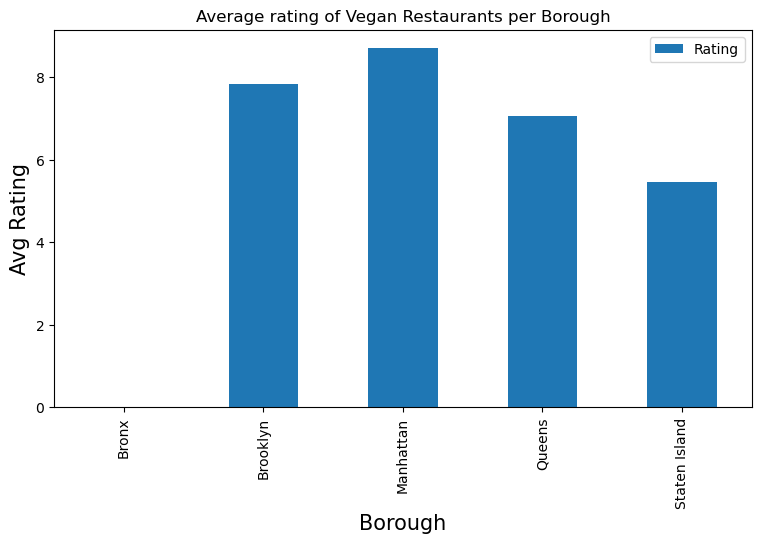

In [129]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Vegan Restaurants per Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Avg Rating', fontsize=15)
#giving a bar plot
vv_restaurants_nyc.groupby('Borough')['Rating'].mean().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Let's look at all the neighborhoods with an average rating higher than 7.0.

In [133]:
neighborhood_stats=neighborhood_stats[neighborhood_stats['Average Rating']>7.5]
neighborhood_stats.head(20)

,Neighborhood,Average Rating
0,Battery Park City,9.200
1,Bay Ridge,7.600
2,Boerum Hill,8.700
3,Briarwood,7.900
4,Bushwick,8.800
5,Carnegie Hill,8.200
6,Chinatown,9.200
7,Civic Center,9.200
8,Clinton,8.100
9,Clinton Hill,8.400


In [137]:
neighborhood_stats.shape

(48, 2)

There are 48 neighborhoods in New York City with an average vegan restaurant rating greater than 7.5

Let's map these neighborhoods

In [143]:
#join datasets
neighborhood_stats=pd.merge(neighborhood_stats,neighborhoods, on='Neighborhood')
neighborhood_stats=neighborhood_stats[['Borough', 'Neighborhood', 'Average Rating', 'Latitude', 'Longitude']]
neighborhood_stats.head()

,Borough,Neighborhood,Average Rating,Latitude,Longitude
0,Manhattan,Battery Park City,9.2,40.711932,-74.016869
1,Brooklyn,Bay Ridge,7.6,40.625801,-74.030621
2,Brooklyn,Boerum Hill,8.7,40.685683,-73.983748
3,Queens,Briarwood,7.9,40.710935,-73.811748
4,Brooklyn,Bushwick,8.8,40.698116,-73.925258


In [153]:
vv_map=folium.Map(location=[latitude, longitude], zoom_start=10)
rating=folium.map.FeatureGroup()

for lat, lng, in neighborhood_stats[['Latitude', 'Longitude']].values:
     rating.add_child(
        folium.CircleMarker(
            [lat,lng],
            radius=8,
            color='green',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.6,
        )
     )

Add Average Ratings to map

In [155]:
neighborhood_stats['Label']=neighborhood_stats['Neighborhood']+', '+neighborhood_stats['Borough']+'('+neighborhood_stats['Average Rating'].map(str)+')'
for lat, lng, label in neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(vv_map)        
vv_map.add_child(rating)

# **Results**

The Boroughs of Manhattan and Brooklyn have both the largest number of vegan restaurants and the highest average rated vegan restaurants. The Boroughs of Queens, Staten Island and Bronx had both the least number of vegan restaurants and the lowest average rated vegan restaurants.

# **Discussion**

Foursquare's API was utilized to filter out the vegan restaurants; however, foursquare includes both vegan and vegetarian in the same category (e.g. vegetarian/vegan).  Because vegans are almost always able to find vegan food at vegetarian restaurants, we included both vegetarian and vegan restaurants as being 'vegan'.   

# **Conclusion**

The recommended locations for opening a new vegan restaurant are in the Boroughs of Manhattan and Brooklyn. These two Boroughs have numerous successful and highly rated vegan restaurants and as the demand for vegan offerings continue to grow, we believe people seeking vegan food options will continue to flock to these two Boroughs. Looking at neighborhoods specifically, the East Village currently has the most vegan restaurants, but not the highest ratings, so our recommendation is to not start a new restaurant in the East Village due to competition. Four possible neighborhoods to start a new restaurant are Battery Park City, Lower East Side, Chinatown and Civic Center; each of these locations have highly rated vegan restaurants, but do not have the most restaurants, so there is less risk of competition.